In [1]:
import jax.numpy as jnp
import numpy as np
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt

In [2]:
from jax import grad
from tqdm import tqdm

In [3]:
X, y = make_blobs(n_samples = 500, n_features = 2, centers=2, cluster_std = 0.5, random_state = 0)

In [4]:
X = np.hstack((X, np.ones_like(y).reshape(-1,1)))
y[y == 0] = -1

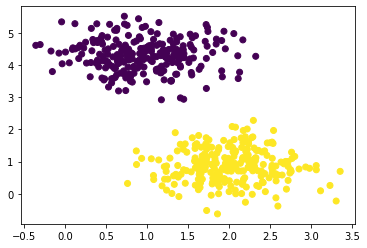

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [6]:
def predict(w, X):
  return jnp.dot(X, w)

In [7]:
def loss(w):
  preds = predict(w, X)
  return jnp.mean(jnp.clip(1 - jnp.multiply(y, preds), a_min=0))

In [8]:
np.random.seed(0)

w = np.random.randn(3)

In [9]:
n_iters = 200
lr = 0.01
loss_grad = grad(loss)

losses = np.zeros(n_iters)
pbar = tqdm(range(n_iters))

for i in range(n_iters):
  grads = loss_grad(w)
  w = w - lr * grads

  tmp_loss = loss(w)
  losses[i] = tmp_loss

  pbar.set_postfix({'loss':tmp_loss})
  pbar.update()

  if tmp_loss == 0:
    break
pbar.close()

100%|██████████| 200/200 [00:02<00:00, 67.14it/s, loss=0.012640317]


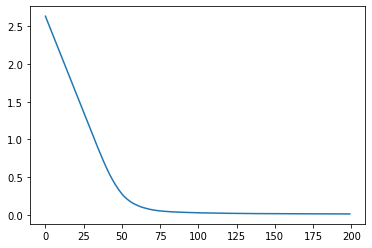

In [10]:
plt.plot(losses)

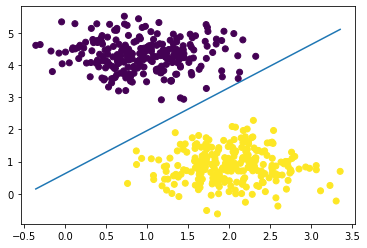

In [11]:
plt.scatter(X[:, 0], X[0:, 1], c=y)
xs = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
plt.plot(xs, (xs * w[0] + w[2]) / -w[1])